# EDA  on gaana.com dataset
-about data set: contains data from gaana.com regarding the songs(~45k) from different languages 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df=pd.read_csv('gaanasongs.csv')

In [3]:
df.head()

,name,singer,singer_id,duration,link,language
0,Dil - E - Nadan Tujhe,Chitra Singh|Jagjit Singh,/artist/chitra-singh|/artist/jagjeet-singh-1,05:00,/dil-e-nadan-tujhe-3,Urdu
1,Agar Hum Kahen Aur Woh Muskara De,Chitra Singh|Jagjit Singh,/artist/chitra-singh|/artist/jagjeet-singh-1,06:26,/agar-hum-kahen-aur-woh-muskura-den,Urdu
2,Unke Dekhe Se,Jagjit Singh,/artist/jagjeet-singh-1,03:41,/unke-dekhe-se,Urdu
3,Yeh Na Thi Hamari Qismat - Chitra Singh,Chitra Singh,/artist/chitra-singh,04:26,/yeh-na-thi-hamari-qismat-2,Urdu
4,Hazaron Khwahishen Aisi,Jagjit Singh,/artist/jagjeet-singh-1,05:39,/hazaron-khwahishen-aisi-1,Urdu


In [4]:
df.tail()

,name,singer,singer_id,duration,link,language
41350,Chaaridike Paaper Andhar (Manush Janam Diye Bi...,Kishore Kumar,/artist/kishore-kumar,03:23,/chaaridike-paaper-andhar-manush-janam-diye-bidhi,Bengali
41351,Ei Ki Go Shesh Daan,Feroza Begum,/artist/feroza-begum,03:56,/ei-kigo-sesh-daan,Bengali
41352,Ei Je Bangla,Sandhya Mukherjee|Hemant Kumar,/artist/sandhya-mukherjee|/artist/hemanta-mukh...,07:36,/ei-je-bangla,Bengali
41353,Jatone Hridaye Rekho,Ajoy Chakrabarty,/artist/ajoy-chakrabarty,04:29,/jatone-hridaye-rekho,Bengali
41354,Tomar Je Oi Haater Mala,Asha Bhosle,/artist/asha-bhosle-1,03:22,/tomar-je-oi-haater-mala,Bengali


In [5]:
df.shape

(41355, 6)

In [6]:
df.columns

Index(['name', 'singer', 'singer_id', 'duration', 'link', 'language'], dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41355 entries, 0 to 41354
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   name       41355 non-null  object
 1   singer     41355 non-null  object
 2   singer_id  41355 non-null  object
 3   duration   41355 non-null  object
 4   link       41355 non-null  object
 5   language   41355 non-null  object
dtypes: object(6)
memory usage: 1.9+ MB


In [8]:
df.describe()

,name,singer,singer_id,duration,link,language
count,41355,41355,41355,41355,41355,41355
unique,31534,6196,6580,1309,36361,16
top,O Mere Dil Ke Chain,Lata Mangeshkar,/artist/lata-mangeshkar,03:02,/kya-khoob-lagti-ho,Telugu
freq,26,1410,1410,447,2,4996


# checking null values

In [9]:
df.isnull().sum()

#obs: no null val in the dataset

name         0
singer       0
singer_id    0
duration     0
link         0
language     0
dtype: int64

<AxesSubplot:>

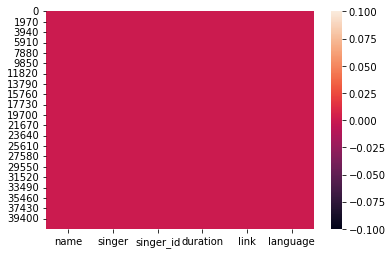

In [10]:
sns.heatmap(df.isnull())

#obs:single shade---> null val not present

#  DATA PREPROCESSING
 -WORKING WITH DURATION

In [11]:
#converting data from min to sec
duration_list=[]
for duration in df['duration']:
    
      m=int(duration.split(':')[0])
      s=int(duration.split(':')[1])
      sec=(m*60)+s
      duration_list.append(sec)
      
        

   

In [12]:
len(duration_list)        
df['duration']=duration_list   

In [13]:
df.head()

,name,singer,singer_id,duration,link,language
0,Dil - E - Nadan Tujhe,Chitra Singh|Jagjit Singh,/artist/chitra-singh|/artist/jagjeet-singh-1,300,/dil-e-nadan-tujhe-3,Urdu
1,Agar Hum Kahen Aur Woh Muskara De,Chitra Singh|Jagjit Singh,/artist/chitra-singh|/artist/jagjeet-singh-1,386,/agar-hum-kahen-aur-woh-muskura-den,Urdu
2,Unke Dekhe Se,Jagjit Singh,/artist/jagjeet-singh-1,221,/unke-dekhe-se,Urdu
3,Yeh Na Thi Hamari Qismat - Chitra Singh,Chitra Singh,/artist/chitra-singh,266,/yeh-na-thi-hamari-qismat-2,Urdu
4,Hazaron Khwahishen Aisi,Jagjit Singh,/artist/jagjeet-singh-1,339,/hazaron-khwahishen-aisi-1,Urdu


# Data Analysis

In [14]:
#1 Average duration of song throughout the dataset

avg_song_duration=df['duration'].sum()/len(df['duration'])
print(int(avg_song_duration))

#obs : avg duration of song is 295 sec

295


In [63]:
# song with max duration?
max=df['duration'].max()
df[df['duration']==max]



,name,singer,singer_id,duration,link,language
818,Yeh Paisa Kya Karega,Aziz Miyan Qawwal,/artist/aziz-miyan-qawwal,3595,/yeh-paisa-kya-karega-2,Urdu


In [66]:
# song with min duration?
min=df['duration'].min()
df[df['duration']==min].head(1)

,name,singer,singer_id,duration,link,language
22952,Dialogues (Ghulami): Aahi Jaana Mere Liye,Ost,/artist/ost,17,/dialogue-aahi-jana-mere-liye,Hindi


In [15]:
#2 How many languages of songs are there in the data set

no_of_languages=df['language'].nunique()
print(no_of_languages)


#obs: 1-There are 16 different languages of songs
     

16


Text(0.5, 1.0, 'Songs_Count vs Languages')

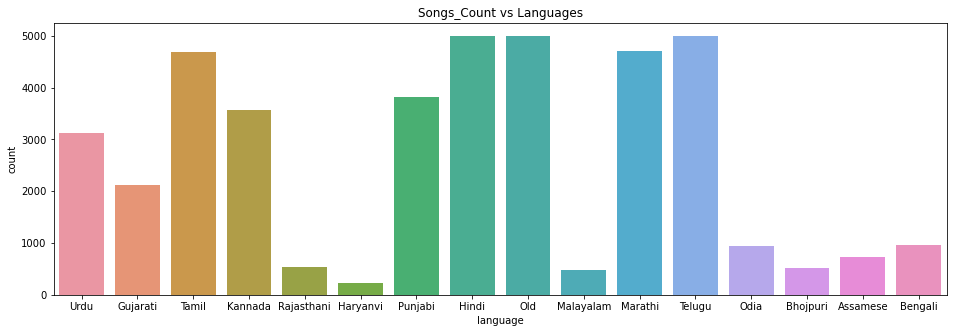

In [108]:
plt.figure(figsize=(16,5))
sns.countplot(x='language',data=df)
plt.title("Songs_Count vs Languages")

In [17]:
#3 what are all the languages in the data set

languages=df['language'].unique()
print(languages)

#obs: lang are: 'Urdu' 'Gujarati' 'Tamil' 'Kannada' 'Rajasthani' 'Haryanvi' 'Punjabi'
# 'Hindi' 'Old' 'Malayalam' 'Marathi' 'Telugu' 'Odia' 'Bhojpuri' 'Assamese'
# 'Bengali

['Urdu' 'Gujarati' 'Tamil' 'Kannada' 'Rajasthani' 'Haryanvi' 'Punjabi'
 'Hindi' 'Old' 'Malayalam' 'Marathi' 'Telugu' 'Odia' 'Bhojpuri' 'Assamese'
 'Bengali']


In [18]:
#4 How many punjaabi songs are their?

count_punjabi=len(df[df['language']=='Punjabi'])
print(count_punjabi)

#obs: there are 3818 punjaabi songs



3818


In [19]:
#5 Number of songs in each language


for lang in df['language'].unique():
    print(lang,len(df[df['language']==lang]))
    
'''
obs:
Urdu 3116
Gujarati 2115
Tamil 4677
Kannada 3559
Rajasthani 541
Haryanvi 228
Punjabi 3818
Hindi 4993
Old 4993
Malayalam 479
Marathi 4699
Telugu 4996
Odia 940
Bhojpuri 519
Assamese 724
Bengali 958


hence :telugu has max no of songs
'''    

Urdu 3116
Gujarati 2115
Tamil 4677
Kannada 3559
Rajasthani 541
Haryanvi 228
Punjabi 3818
Hindi 4993
Old 4993
Malayalam 479
Marathi 4699
Telugu 4996
Odia 940
Bhojpuri 519
Assamese 724
Bengali 958


'\nobs:\nUrdu 3116\nGujarati 2115\nTamil 4677\nKannada 3559\nRajasthani 541\nHaryanvi 228\nPunjabi 3818\nHindi 4993\nOld 4993\nMalayalam 479\nMarathi 4699\nTelugu 4996\nOdia 940\nBhojpuri 519\nAssamese 724\nBengali 958\n\n\nhence :telugu has max no of songs\n'

Text(0.5, 1.0, 'Songs_Count vs Languages')

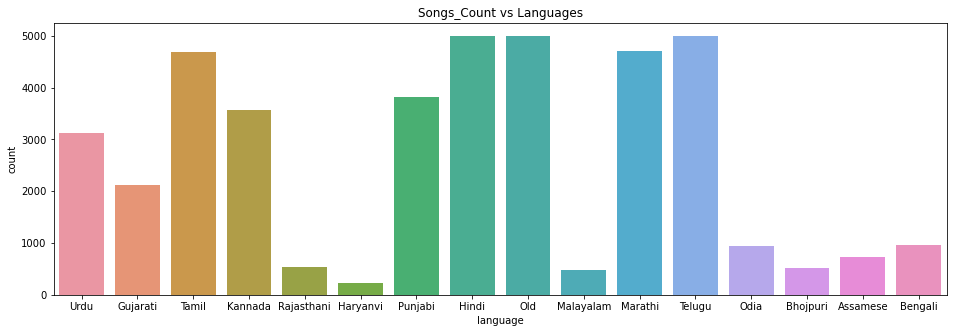

In [109]:
plt.figure(figsize=(16,5))
sns.countplot(x='language',data=df)  
plt.title("Songs_Count vs Languages")
#obs:telugu has max no of songs

In [21]:
#6 Average duration of song in each language

average_duration_of_songs=df.groupby(df['language'])['duration'].mean()
average_duration_of_songs

'''
obs:
language
Assamese      228.325967
Bengali       255.179541
Bhojpuri      357.138728
Gujarati      271.632151
Haryanvi      320.004386
Hindi         307.873022
Kannada       250.592863
Malayalam     242.609603
Marathi       281.163865
Odia          257.629787
Old           307.873022
Punjabi       324.020691
Rajasthani    291.040665
Tamil         270.590336
Telugu        279.234788
Urdu          407.272465

hence max duration of songs are from urdu language
'''

'\nobs:\nlanguage\nAssamese      228.325967\nBengali       255.179541\nBhojpuri      357.138728\nGujarati      271.632151\nHaryanvi      320.004386\nHindi         307.873022\nKannada       250.592863\nMalayalam     242.609603\nMarathi       281.163865\nOdia          257.629787\nOld           307.873022\nPunjabi       324.020691\nRajasthani    291.040665\nTamil         270.590336\nTelugu        279.234788\nUrdu          407.272465\n\nhence max duration of songs are from urdu language\n'

Text(0.5, 1.0, 'Song_Duration vs Languages')

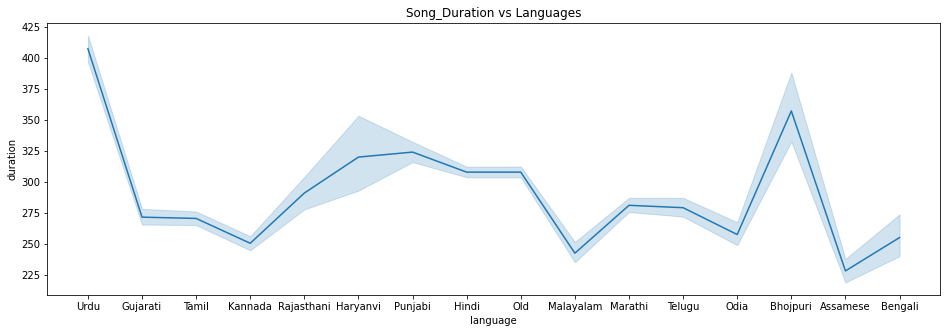

In [110]:
plt.figure(figsize=(16,5))
sns.lineplot(x='language',y='duration',data=df)
plt.title("Song_Duration vs Languages")
#obs:max duration of songs are from urdu language

In [28]:
#7 name of all singers in the dataset

singers=list(set(all_singers))
for i in singers:
    print(i)

Jayamala Shiledar
Harwinder Biba
Samina Zahid
Minoo Purushotam
Habib Wali Mohammed
Archana Udupa
Iqbal Bano
G. K. Venkatesh
Shahir Chu Bharadkar
Jaswin Jassi
Wilson
Ustad Faiyaz Khan
Akshya Mohanty
HEERA LAL YADAV
Arbor Hills
Samina Ashfaq
Anil
Subir Nandi
Mehul Kumar
Praveen Karpagam
Akshya Mohanty Baboo
Kisan Killekar
Sheshgiri Hangal
Asomi
Mohd Azam Chishti
Rudrappa
Kiran Sharma
Rajni Gupta
Tarannum Malik
Durga Jasraj
Kalpana Shirur
Raja Babu
Savita
Tripti Das
Swagatika
Aju Barkakati
Ila Arun
A.V.Ramanan
Temi Enty
P Nageshwara Rao
Jensy
Shyamamani Devi
Bhaktha Swaraa Bhajan Mandali
Amarjyot
Mohammad Sazid
Sundar
N. Malini
Gurdev Singh Jogi
Anette
Arun Hangal
Damodar Vitawkar
Kamini Kaushal
Mangala Joshi
Asad Amanat Ali Khan
Gurminder Kaur
Koundamani
Fateh Kumar Vyas
Kehar Singh Sapera
Utpala
S. Janki
MANJEET KAUR
Mangesh Padgaonkar
Dhanada Pathak
Vangara
Sadhna Sargam
Nisha
Shivakumar
Chandna Dixit
Vasant Ajgaokar
Hariram
Biren Deka
Akashvani Vadya Vrinda
Mamta Singh
Abhishek Bachch

In [26]:
#8 how many singers are there in the dataset

all_singers=[]
for singers in df['singer']:
    all_singers+=singers.split('|')
print('Total Singers',len(set(all_singers)))

#obs: total unique singers are 3940

Total Singers 3940


In [27]:
#9 Singers who sang the most songs?

data = []

unique_singers = list(set(all_singers))

for i in (unique_singers):

  c = 0
  for singers_ in df['singer']:
    if (i in singers_):
      c += 1

  data.append([i,c])

In [29]:
songs = pd.DataFrame(data, columns = ['singer','songs'])

songs.sort_values(by = 'songs', ascending = False).head(5)

'''obs: S. P. Balasubrahmanyam sang most no of songs i.e 3659 followed by 
Kumar	3270
2423	Susheel	3216
427	Susheela	3215
3646	P. Susheela	3213 '''

,singer,songs
3378,S. P. Balasubrahmanyam,3659
3769,Kumar,3270
2423,Susheel,3216
427,Susheela,3215
3646,P. Susheela,3213


Text(0.5, 1.0, 'Top 5 singers who sang most number of songs')

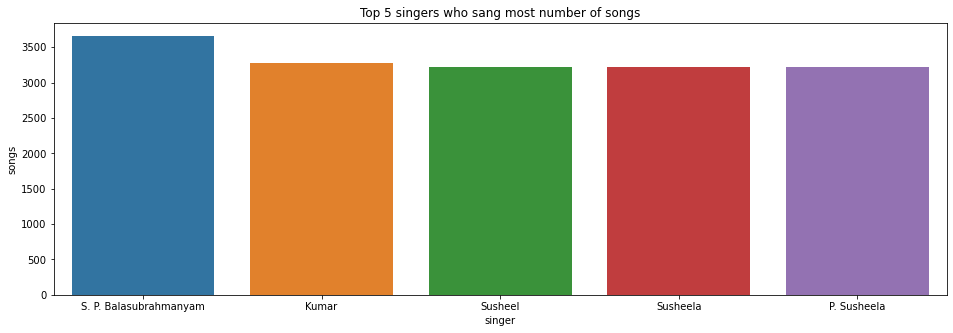

In [55]:
top_singers=pd.DataFrame(songs[['singer','songs']]).sort_values(by = 'songs', ascending = False).head(5)
top_singers
plt.figure(figsize=(16,5))
sns.barplot(data = top_singers, y = 'songs', x = 'singer')
plt.title('Top 5 singers who sang most number of songs')

#obs: S. P. Balasubrahmanyam sang most no of songs i.e 3659

In [79]:
#10 Singer who played most number of songs in each language?
data2=[]
for lang in df['language'].unique():

  df_ = df[df['language'] == lang]
  
  all_singer = []
  for singers in df_['singer']:
    all_singer += singers.split('|')

  print(lang, len(df_),len(set(all_singer)))
  data2.append([lang,len(df_),all_singer])

Urdu 3116 385
Gujarati 2115 303
Tamil 4677 510
Kannada 3559 379
Rajasthani 541 218
Haryanvi 228 76
Punjabi 3818 636
Hindi 4993 515
Old 4993 515
Malayalam 479 72
Marathi 4699 569
Telugu 4996 369
Odia 940 243
Bhojpuri 519 109
Assamese 724 228
Bengali 958 192


In [84]:
top_singer_by_lang = pd.DataFrame(data2, columns = ['language','no_of_songs','singer']).sort_values(by = 'no_of_songs', ascending = False).head(5)
top_singer_by_lang


,language,no_of_songs,singer
11,Telugu,4996,"[S. P. Balasubrahmanyam, S. Janaki, S. P. Bala..."
7,Hindi,4993,"[Kishore Kumar, Lata Mangeshkar, Kishore Kumar..."
8,Old,4993,"[Kishore Kumar, Lata Mangeshkar, Kishore Kumar..."
10,Marathi,4699,"[Suresh Wadkar, Sudesh Bhonsle, Shailendra Sin..."
2,Tamil,4677,"[K J Yesudas, S. Janaki, S. P. Balasubrahmanya..."


In [97]:
# top 5 songs
top_songs=df['name'].value_counts().nlargest(n=5)
top_songs

#obs: top song is O Mere Dil Ke Chain 

O Mere Dil Ke Chain               26
Hamen Tumse Pyar Kitna            22
Padhyams                          20
Chura Liya Hai Tumne Jo Dil Ko    18
Yeh Sham Mastani                  18
Name: name, dtype: int64

Text(0.5, 1.0, 'top 5 songs')

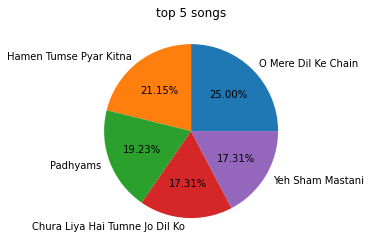

In [96]:
plt.pie(top_songs,labels=top_songs.index,autopct='%.2f%%')
plt.title('top 5 songs')